In [141]:
import keras
import tensorflow
import numpy as np
import os
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from scipy.misc import imread
import sklearn
% matplotlib inline

In [142]:
seed=128
rng=np.random.RandomState(seed)

In [143]:
root_path=os.path.abspath("..\..")
train_dir=os.path.join(root_path,r"Users\PIYUSH\Downloads")
test_dir=os.path.join(root_path,r"Users\PIYUSH\Downloads")
sub_dir=os.path.join(root_path,r"Users\PIYUSH\Downloads")

In [144]:
os.path.exists(test_dir)
os.path.exists(train_dir)

True

In [145]:
sub=pd.read_csv(os.path.join(sub_dir,'Sample.csv'))

In [146]:
train=pd.read_csv(os.path.join(train_dir,'train.csv'))

In [147]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [148]:
test=pd.read_csv(os.path.join(test_dir,'test.csv'))

In [149]:
test.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [150]:
img_name=rng.choice(train.filename)

In [151]:
file_path=os.path.join(train_dir,'Train','Images','train',img_name)

In [152]:
img=imread(file_path,flatten=True)

C:\Users\PIYUSH\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


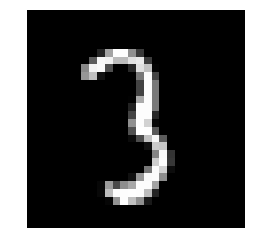

In [153]:
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [154]:
images=[]

In [155]:
for i in train['filename']:
    filepath=os.path.join(train_dir,'Train','Images','train',i)
    img=imread(filepath,flatten=True)
    img=img.astype('float32')
    images.append(img)

C:\Users\PIYUSH\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [156]:
train_x=np.stack(images)

In [157]:
train_x /=255.0

In [158]:
train_x=train_x.reshape(-1,784).astype('float32')

In [159]:
train_x.shape

(49000, 784)

In [160]:
imgs=[]

In [161]:
for i in test['filename']:
    filepath=os.path.join(test_dir,'Train','Images','test',i)
    im=imread(filepath,flatten=True)
    im=im.astype('float32')
    imgs.append(im)

C:\Users\PIYUSH\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
test_x=np.stack(imgs)

In [163]:
test_x /=255.0

In [164]:
test_x=test_x.reshape(-1,784).astype('float32')

In [165]:
test_x.shape

(21000, 784)

In [166]:
train_y=keras.utils.np_utils.to_categorical(train.label.values)

In [167]:
# Model building

In [168]:
input_num_unit=784
hidden_num1=500
hidden_num2=500
hidden_num3=500
hidden_num4=500
hidden_num5=500
output_num_unit=10
epochs=25
batch_size=128
dropout_ratio=0.2

In [169]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,InputLayer,Convolution2D,MaxPooling2D,Flatten

In [170]:
model=Sequential([
    Dense(output_dim=hidden_num1,input_dim=input_num_unit,activation='relu'),
    Dropout(dropout_ratio),
    Dense(output_dim=hidden_num2,input_dim=hidden_num1,activation='relu'),
    Dropout(dropout_ratio),
    Dense(output_dim=hidden_num3,input_dim=hidden_num2,activation='relu'),
    Dropout(dropout_ratio),
    Dense(output_dim=hidden_num4,input_dim=hidden_num3,activation='relu'),
    Dropout(dropout_ratio),
    Dense(output_dim=hidden_num5,input_dim=hidden_num4,activation='relu'),
    Dropout(dropout_ratio),
    Dense(output_dim=output_num_unit,input_dim=hidden_num5,activation='softmax')
])

C:\Users\PIYUSH\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=500)`
  
C:\Users\PIYUSH\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  after removing the cwd from sys.path.
C:\Users\PIYUSH\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  
C:\Users\PIYUSH\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  
C:\Users\PIYUSH\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, a

In [171]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [172]:
model.fit(train_x,train_y,epochs=epochs,batch_size=batch_size,validation_split=0.3)

Train on 34300 samples, validate on 14700 samples
Epoch 1/25
34300/34300 [==============================] - 27s 784us/step - loss: 0.3891 - acc: 0.8776 - val_loss: 0.1628 - val_acc: 0.9526
Epoch 2/25
34300/34300 [==============================] - 20s 597us/step - loss: 0.1596 - acc: 0.9535 - val_loss: 0.1252 - val_acc: 0.9624
Epoch 3/25
34300/34300 [==============================] - 20s 595us/step - loss: 0.1206 - acc: 0.9645 - val_loss: 0.1239 - val_acc: 0.9639
Epoch 4/25
34300/34300 [==============================] - 22s 639us/step - loss: 0.0962 - acc: 0.9714 - val_loss: 0.1211 - val_acc: 0.9680
Epoch 5/25
34300/34300 [==============================] - 20s 587us/step - loss: 0.0805 - acc: 0.9756 - val_loss: 0.1134 - val_acc: 0.9690
Epoch 6/25
34300/34300 [==============================] - 20s 579us/step - loss: 0.0689 - acc: 0.9784 - val_loss: 0.1090 - val_acc: 0.9718
Epoch 7/25
34300/34300 [==============================] - 20s 581us/step - loss: 0.0572 - acc: 0.9824 - val_loss: 0.

In [173]:
pred=model.predict_classes(test_x,batch_size=128)

In [174]:
img_name=rng.choice(test.filename)

In [175]:
filepath=os.path.join(test_dir,'Train','Images','test',img_name)

In [176]:
imm=imread(filepath,flatten=True)

C:\Users\PIYUSH\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [177]:
test_index=int(img_name.split('.')[0])-train.shape[0]

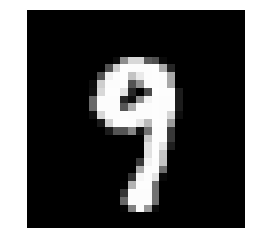

In [178]:
plt.imshow(imm,cmap='gray')
plt.axis('off')
plt.show()

In [179]:
'Prediction is ',pred[test_index]

('Prediction is ', 9)

In [180]:
sub.filename=test.filename
sub.label=pred

In [181]:
sub.to_csv(os.path.join(sub_dir,'sub005.csv'),index=False)

In [182]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_17 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_18 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 500)               250500    
__________